# Weather Prediction Analysis

### Importing modules

In [192]:
# Don't change this cell; just run it.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
# This is a magic function that renders the figure in the notebook, instead of displaying a dump of the figure object.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

### Loading the Data

In [193]:
df_init = pd.read_csv('raw_weather_data.csv')
print("Shape: ", df_init.shape)
df_init.head()

Shape:  (80018, 29)


,Row ID,Station ID,Station Name,Station Province,Station Latitude,Station Longitude,Location,Station Elevation (m),Station Climate Identifier,Station WMO Identifier,...,Heating Degree Days (C),Cooling Degree Days (C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precipitation (mm),Snow on Ground (cm),Speed of Maximum Wind Gust (km/h),Direction of Maximum Wind Gust (10s Deg)
0,2721420210414,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,10.2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2721420210415,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,9.8,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2721420210510,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,9.2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2721420210511,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,6.3,0.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN
4,2721420210127,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,34.0,0.0,NaN,NaN,NaN,NaN,2.1,18.0,NaN,NaN


### Preprocessing the data

In [194]:
# Extracting columns to retain
cols_retain = ["Date", "Station ID", "Station Name", "Maximum Temperature (C)", "Minimum Temperature (C)", "Total Rain (mm)", "Total Snow (cm)", "Total Precipitation (mm)", "Snow on Ground (cm)"]
df = df_init[cols_retain].copy()

# Renaming columns for convenience
df = df.rename(columns={"Station ID": "Station", "Station Name": "Name", "Maximum Temperature (C)":"MaxTemp", "Minimum Temperature (C)": "MinTemp", "Total Rain (mm)": "Rain", "Total Snow (cm)": "Snow", "Total Precipitation (mm)": "Precip", "Snow on Ground (cm)": "SnowGround"})

# Converting Date to datetime and setting it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Dropping rows with missing values in MaxTemp, MinTemp, MeanTemp
# df = df.dropna(subset=['MaxTemp', 'MinTemp', 'MeanTemp'])

# Filling missing values
cols_fill = ['MaxTemp', 'MinTemp', 'SnowGround']
df[cols_fill] = df[cols_fill].ffill().bfill()

df = df.fillna(0)

print("Shape: ", df.shape)
df

### Another idea is to calculate the null percentage of each of the columns and retain the ones with less than 50%.

Shape:  (80018, 8)


,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround
Date,,,,,,,,
2000-01-01,1870,EDMONTON STONY PLAIN,-13.0,-17.5,0.0,4.0,1.6,1.0
2000-01-01,30907,EDMONTON NAMAO AWOS A,-13.0,-17.5,0.0,0.0,0.0,1.0
2000-01-01,27492,EDMONTON STONY PLAIN CS,-10.8,-19.9,0.0,4.0,4.0,1.0
2000-01-01,27793,EDMONTON INTERNATIONAL CS,-8.7,-20.4,0.0,0.0,0.0,1.0
2000-01-01,1868,EDMONTON NAMAO A,-10.9,-19.4,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2024-05-04,53718,EDMONTON SOUTH CAMPUS,13.9,-1.3,0.0,0.0,0.0,0.0
2024-05-04,41783,OLIVER AGDM,13.7,-5.2,0.0,0.0,0.0,0.0
2024-05-04,51758,EDMONTON VILLENEUVE A,13.5,-4.4,0.0,0.0,0.0,0.0


In [195]:
# Final Checks of datatype and NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80018 entries, 2000-01-01 to 2024-05-04
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Station     80018 non-null  int64  
 1   Name        80018 non-null  object 
 2   MaxTemp     80018 non-null  float64
 3   MinTemp     80018 non-null  float64
 4   Rain        80018 non-null  float64
 5   Snow        80018 non-null  float64
 6   Precip      80018 non-null  float64
 7   SnowGround  80018 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.5+ MB


In [196]:
# Check for gaps in our data
df.groupby([df.index.year, 'Station']).size()

Date  Station
2000  1868       362
      1870       366
      27214      366
      27492      366
      27793      366
                ... 
2024  46911      112
      47088      112
      50149      125
      51758      125
      53718      112
Length: 233, dtype: int64

In [197]:
df[['Station', 'Name']].drop_duplicates()

,Station,Name
Date,,
2000-01-01,1870,EDMONTON STONY PLAIN
2000-01-01,30907,EDMONTON NAMAO AWOS A
2000-01-01,27492,EDMONTON STONY PLAIN CS
2000-01-01,27793,EDMONTON INTERNATIONAL CS
2000-01-01,1868,EDMONTON NAMAO A
2000-01-01,27214,EDMONTON BLATCHFORD
2003-01-01,41783,OLIVER AGDM
2007-01-01,46911,NEW SAREPTA AGCM
2007-01-01,46850,THORSBY AGCM


In [198]:
# Fill in the id based on the above table
id = [30907,]
df = df[df["Station"].isin(id)]
df.groupby(df.index.year).size()

Date
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    277
2019    365
2020    354
2021    359
2022      5
dtype: int64

### Visualizing the Data

<AxesSubplot: xlabel='Date'>

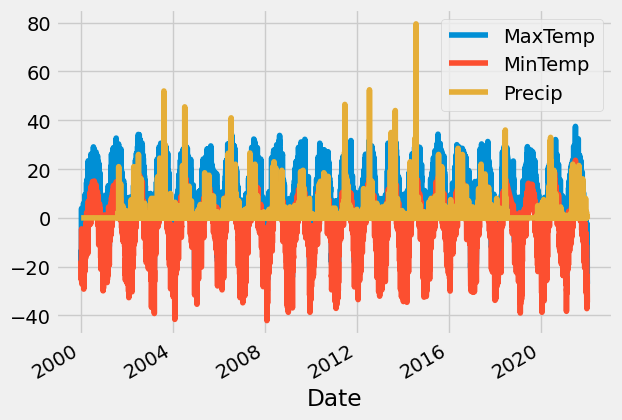

In [199]:
df[['MaxTemp', 'MinTemp', 'Precip']].plot()

### Setting the Target Column

In [200]:
df["Target Max"] = df.shift(-1)['MaxTemp']
df["Target Min"] = df.shift(-1)['MinTemp']
df = df.ffill()
df

C:\Temp\ipykernel_1540\1323506685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target Max"] = df.shift(-1)['MaxTemp']
C:\Temp\ipykernel_1540\1323506685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target Min"] = df.shift(-1)['MinTemp']


,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target Max,Target Min
Date,,,,,,,,,,
2000-01-01,30907,EDMONTON NAMAO AWOS A,-13.0,-17.5,0.0,0.0,0.0,1.0,-17.2,-22.2
2000-01-02,30907,EDMONTON NAMAO AWOS A,-17.2,-22.2,0.0,0.0,0.0,5.0,-17.9,-25.5
2000-01-03,30907,EDMONTON NAMAO AWOS A,-17.9,-25.5,0.0,0.0,0.0,1.0,-14.0,-21.9
2000-01-04,30907,EDMONTON NAMAO AWOS A,-14.0,-21.9,0.0,0.0,0.0,1.0,-5.1,-13.0
2000-01-05,30907,EDMONTON NAMAO AWOS A,-5.1,-13.0,0.0,0.0,0.0,5.0,-2.0,-13.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,30907,EDMONTON NAMAO AWOS A,-8.4,-32.8,0.0,0.0,0.5,32.0,-2.4,-23.5
2022-01-02,30907,EDMONTON NAMAO AWOS A,-2.4,-23.5,0.0,0.0,0.5,26.0,-22.9,-25.5
2022-01-03,30907,EDMONTON NAMAO AWOS A,-22.9,-25.5,0.0,0.0,0.5,25.0,-25.2,-31.3


In [201]:
### Checking for linearity
df.corr()

,Station,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target Max,Target Min
Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxTemp,NaN,1.000000,0.938886,0.081597,-0.110691,0.095372,-0.615225,0.934716,0.931511
MinTemp,NaN,0.938886,1.000000,0.122332,-0.083593,0.170652,-0.628462,0.889593,0.930475
Rain,NaN,0.081597,0.122332,1.000000,-0.008128,0.526105,-0.075269,0.084773,0.112282
Snow,NaN,-0.110691,-0.083593,-0.008128,1.000000,0.170817,0.068621,-0.118661,-0.104315
Precip,NaN,0.095372,0.170652,0.526105,0.170817,1.000000,-0.086692,0.097810,0.145531
SnowGround,NaN,-0.615225,-0.628462,-0.075269,0.068621,-0.086692,1.000000,-0.597781,-0.614842
Target Max,NaN,0.934716,0.889593,0.084773,-0.118661,0.097810,-0.597781,1.000000,0.938939
Target Min,NaN,0.931511,0.930475,0.112282,-0.104315,0.145531,-0.614842,0.938939,1.000000


### Importing training Libraries

In [202]:
# from sklearn.linear_model import Ridge

# rr = Ridge(alpha=0.01)

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

In [203]:
predictors = df.columns[~df.columns.isin(['Target Max', 'Target Min', 'Name', 'Station'])]
predictors

Index(['MaxTemp', 'MinTemp', 'Rain', 'Snow', 'Precip', 'SnowGround'], dtype='object')

### Training the Model

We will use K-Fold Cross Validation, but we got to be very careful to not use future data to predict the past. So we will use backtest cross validation to account for it.

In [204]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        assert train[predictors].isna().sum().sum() == 0
        assert train[predictors].isin([np.inf, -np.inf]).sum().sum() == 0

        model.fit(train[predictors], train[['Target Max', 'Target Min']])

        preds = model.predict(test[predictors])

        # preds = pd.Series(preds, index=test.index)
        # combined = pd.concat([test["Target Max"], preds], axis=1) # Concatenate real test data with predictions to calculate error

        # all_predictions.append(combined)
        preds = pd.DataFrame(preds, columns=['Target Max', 'Target Min'], index=test.index)
        combined = pd.concat([test[['Target Max', 'Target Min']], preds], axis=1) # Concatenate real test data with predictions to calculate error
        all_predictions.append(combined)
    
    return pd.concat(all_predictions, axis=0)

In [205]:
predictions = backtest(df, model, predictors)

In [210]:
predictions.columns = ['Actual Max', 'Actual Min', 'Predicted Max', 'Predicted Min']

### Learning the accuracy

In [211]:
from sklearn.metrics import mean_absolute_error

print("Max Temp MAE: ", mean_absolute_error(predictions["Actual Max"], predictions["Predicted Max"]))
print("Min Temp MAE: ", mean_absolute_error(predictions["Actual Min"], predictions["Predicted Min"]))

Max Temp MAE:  3.6820452196409836
Min Temp MAE:  2.9480158568094676


### Improving our model

In [ ]:
def pct_diff(old, new):
    return np.clip((new - old) / old, np.finfo(np.float64).min, np.finfo(np.float64).max)

def compute_rolling(weather, horizon, col):
    label = f"{col}_rolling_{horizon}"

    weather[label] = weather[col].rolling(horizon).mean()
    # weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ["MaxTemp", "MinTemp", "Precip"]:
        df = compute_rolling(df, horizon, col)

In [ ]:
df 

,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target Max,Target Min,MaxTemp_rolling_3,MinTemp_rolling_3,Precip_rolling_3,MaxTemp_rolling_14,MinTemp_rolling_14,Precip_rolling_14
Date,,,,,,,,,,,,,,,,
2000-01-01,30907,EDMONTON NAMAO AWOS A,-13.0,-17.5,0.0,0.0,0.0,1.0,-17.2,-22.2,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,30907,EDMONTON NAMAO AWOS A,-17.2,-22.2,0.0,0.0,0.0,5.0,-17.9,-25.5,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,30907,EDMONTON NAMAO AWOS A,-17.9,-25.5,0.0,0.0,0.0,1.0,-14.0,-21.9,-16.033333,-21.733333,0.000000,NaN,NaN,NaN
2000-01-04,30907,EDMONTON NAMAO AWOS A,-14.0,-21.9,0.0,0.0,0.0,1.0,-5.1,-13.0,-16.366667,-23.200000,0.000000,NaN,NaN,NaN
2000-01-05,30907,EDMONTON NAMAO AWOS A,-5.1,-13.0,0.0,0.0,0.0,5.0,-2.0,-13.0,-12.333333,-20.133333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,30907,EDMONTON NAMAO AWOS A,-8.4,-32.8,0.0,0.0,0.5,32.0,-2.4,-23.5,-18.633333,-32.666667,0.166667,-17.100000,-26.600000,0.464286
2022-01-02,30907,EDMONTON NAMAO AWOS A,-2.4,-23.5,0.0,0.0,0.5,26.0,-22.9,-25.5,-11.800000,-29.466667,0.333333,-16.100000,-26.285714,0.500000
2022-01-03,30907,EDMONTON NAMAO AWOS A,-22.9,-25.5,0.0,0.0,0.5,25.0,-25.2,-31.3,-11.233333,-27.266667,0.500000,-16.978571,-26.928571,0.464286


In [ ]:
# Remove the first 14 rows which has missing values
df = df.iloc[14:,:]
df

,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target Max,Target Min,MaxTemp_rolling_3,MinTemp_rolling_3,Precip_rolling_3,MaxTemp_rolling_14,MinTemp_rolling_14,Precip_rolling_14
Date,,,,,,,,,,,,,,,,
2000-01-15,30907,EDMONTON NAMAO AWOS A,-21.1,-27.2,0.0,0.0,0.0,7.0,-18.3,-23.6,-22.233333,-25.800000,0.000000,-11.257143,-17.307143,0.000000
2000-01-16,30907,EDMONTON NAMAO AWOS A,-18.3,-23.6,0.0,0.0,0.0,8.0,-14.7,-21.1,-21.000000,-25.333333,0.000000,-11.335714,-17.407143,0.000000
2000-01-17,30907,EDMONTON NAMAO AWOS A,-14.7,-21.1,0.0,0.0,0.0,15.0,-16.6,-20.5,-18.033333,-23.966667,0.000000,-11.107143,-17.092857,0.000000
2000-01-18,30907,EDMONTON NAMAO AWOS A,-16.6,-20.5,0.0,0.0,0.0,14.0,-8.0,-18.5,-16.533333,-21.733333,0.000000,-11.292857,-16.992857,0.000000
2000-01-19,30907,EDMONTON NAMAO AWOS A,-8.0,-18.5,0.0,0.0,0.0,23.0,-7.9,-17.6,-13.100000,-20.033333,0.000000,-11.500000,-17.385714,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,30907,EDMONTON NAMAO AWOS A,-8.4,-32.8,0.0,0.0,0.5,32.0,-2.4,-23.5,-18.633333,-32.666667,0.166667,-17.100000,-26.600000,0.464286
2022-01-02,30907,EDMONTON NAMAO AWOS A,-2.4,-23.5,0.0,0.0,0.5,26.0,-22.9,-25.5,-11.800000,-29.466667,0.333333,-16.100000,-26.285714,0.500000
2022-01-03,30907,EDMONTON NAMAO AWOS A,-22.9,-25.5,0.0,0.0,0.5,25.0,-25.2,-31.3,-11.233333,-27.266667,0.500000,-16.978571,-26.928571,0.464286


In [ ]:
# Changing all null values to 0
df = df.fillna(0)

### Adding more predictors
Finding the average specific to the month eyeballing to all the years since 2000.

In [ ]:
# Take all the rows previous to the current row and calculate the mean
def expand_mean(df):
    return df.expanding(1).mean()

# Calculate the mean of the columns for each month of all the years
for col in ["MaxTemp", "MinTemp", "Precip"]:
    df[f"month_avg_{col}"] = df[col].groupby(df.index.month, group_keys=False).apply(expand_mean)
    df[f"day_avg_{col}"] = df[col].groupby(df.index.day_of_year, group_keys=False).apply(expand_mean)

In [ ]:
predictors = df.columns[~df.columns.isin(['Target', 'Name', 'Station'])]
predictors

Index(['MaxTemp', 'MinTemp', 'Rain', 'Snow', 'Precip', 'SnowGround',
       'Target Max', 'Target Min', 'MaxTemp_rolling_3', 'MinTemp_rolling_3',
       'Precip_rolling_3', 'MaxTemp_rolling_14', 'MinTemp_rolling_14',
       'Precip_rolling_14', 'month_avg_MaxTemp', 'day_avg_MaxTemp',
       'month_avg_MinTemp', 'day_avg_MinTemp', 'month_avg_Precip',
       'day_avg_Precip'],
      dtype='object')

Remove NaN, infinity or a value too large for dtype('float64')

In [ ]:
predictions = backtest(df, rr, predictors)

In [ ]:
predictions

,actual,predicted,diff
Date,,,
2010-01-12,-0.2,-0.200001,7.603056e-07
2010-01-13,1.5,1.499999,9.266090e-07
2010-01-14,4.2,4.200000,2.697058e-07
2010-01-15,2.4,2.400000,1.281820e-07
2010-01-16,-2.8,-2.800000,2.725698e-07
...,...,...,...
2022-01-01,-2.4,-2.400001,5.234602e-07
2022-01-02,-22.9,-22.899999,1.347251e-06
2022-01-03,-25.2,-25.200000,3.150817e-07


In [ ]:
mean_absolute_error(predictions["actual"], predictions["predicted"])

3.949127856308037e-07

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,predicted,diff
Date,,,
2011-01-17,-4.8,-4.800002,2.423576e-06
2011-11-21,5.6,5.599998,2.358734e-06
2012-12-27,-3.3,-3.300002,2.116648e-06
2014-12-08,11.2,11.199998,2.037345e-06
2010-12-31,-1.5,-1.500002,1.950062e-06
...,...,...,...
2016-07-06,22.7,22.700000,7.146461e-10
2015-06-07,24.2,24.200000,5.345591e-10
2019-05-13,16.6,16.600000,4.688694e-10


<AxesSubplot: >

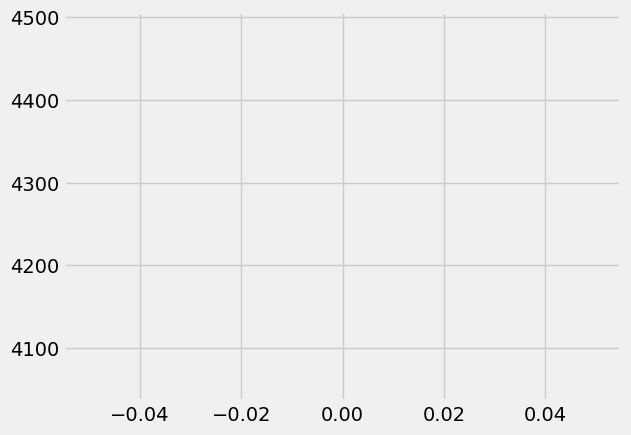

In [ ]:
predictions["diff"].round().value_counts().sort_index().plot()